<a href="https://colab.research.google.com/github/Alfiaadmy/clustering-kmeans-scratch/blob/main/clustering_kmeans_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NAMA ANGGOTA KELOMPOK

### 1. Aulia Wulandari_1206230002
### 2. Era Estiana_1206230017
### 3. Alfia Damayanti_1206230041

##Eksplorasi dan Persiapan Data

---------------------- BACA DATA DAN PERSIAPAN ----------------------

1.   Item daftar
2.   Item daftar



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

df = pd.read_csv(url)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Eksplorasi

In [ ]:
# Info data dan statistik deskriptif
print("Info data:")
df.info()

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# Deskripsi Data
print("Deskripsi Data:")
df.describe()

Deskripsi Data:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Cek missing values
print("Missing values per kolom:")
df.isnull().sum()

Missing values per kolom:


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
# Cek duplikat
print("Duplikat data:")
df.duplicated().sum()

Duplikat data:


np.int64(0)

In [ ]:
# ---------------------- NORMALISASI ----------------------
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

# Pilih kolom yang diperlukan (untuk clustering sesuai grup fitur)
data_clustering = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Siapkan data untuk tiap cluster
data_cluster1 = df[['Fresh', 'Frozen']].copy()
data_cluster2 = df[['Milk', 'Grocery']].copy()
data_cluster3 = df[['Detergents_Paper', 'Delicassen']].copy()

# Eksplorasi sederhana: cek statistik dasar untuk setiap cluster
print("Cluster 1 (Fresh, Frozen) stats:")
print(data_cluster1.describe())
print("\nCluster 2 (Milk, Grocery) stats:")
print(data_cluster2.describe())
print("\nCluster 3 (Detergents_Paper, Delicassen) stats:")
print(data_cluster3.describe())

# Normalisasi
data_cluster1_norm = normalize(data_cluster1)
data_cluster2_norm = normalize(data_cluster2)
data_cluster3_norm = normalize(data_cluster3)


Cluster 1 (Fresh, Frozen) stats:
               Fresh        Frozen
count     440.000000    440.000000
mean    12000.297727   3071.931818
std     12647.328865   4854.673333
min         3.000000     25.000000
25%      3127.750000    742.250000
50%      8504.000000   1526.000000
75%     16933.750000   3554.250000
max    112151.000000  60869.000000

Cluster 2 (Milk, Grocery) stats:
               Milk       Grocery
count    440.000000    440.000000
mean    5796.265909   7951.277273
std     7380.377175   9503.162829
min       55.000000      3.000000
25%     1533.000000   2153.000000
50%     3627.000000   4755.500000
75%     7190.250000  10655.750000
max    73498.000000  92780.000000

Cluster 3 (Detergents_Paper, Delicassen) stats:
       Detergents_Paper    Delicassen
count        440.000000    440.000000
mean        2881.493182   1524.870455
std         4767.854448   2820.105937
min            3.000000      3.000000
25%          256.750000    408.250000
50%          816.500000    965.5000

In [ ]:
# ---------------------- DETEKSI DAN HAPUS OUTLIER ----------------------
def calculate_iqr_bounds(df):
    bounds = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        bounds[col] = (lower, upper)
    return bounds

def remove_outliers_with_fixed_bounds(df, bounds):
    mask = pd.Series(True, index=df.index)
    for col in df.columns:
        lower, upper = bounds[col]
        mask = mask & (df[col] >= lower) & (df[col] <= upper)
    return df[mask]

# OUTLIER - gunakan data_clustering yang didefinisikan
data = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
bounds = calculate_iqr_bounds(data)
data_clean = remove_outliers_with_fixed_bounds(data, bounds)

In [ ]:
print("Jumlah data awal:", len(data))
print("Jumlah data setelah outlier dihapus:", len(data_clean))

Jumlah data awal: 440
Jumlah data setelah outlier dihapus: 332


In [ ]:
# Cek apakah masih ada data yang berada di luar batas
def check_remaining_outliers(df, bounds):
    for col in df.columns:
        lower, upper = bounds[col]
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"Outlier sisa pada kolom {col}: {len(outliers)} baris")

check_remaining_outliers(data_clean, bounds)

Outlier sisa pada kolom Fresh: 0 baris
Outlier sisa pada kolom Milk: 0 baris
Outlier sisa pada kolom Grocery: 0 baris
Outlier sisa pada kolom Frozen: 0 baris
Outlier sisa pada kolom Detergents_Paper: 0 baris
Outlier sisa pada kolom Delicassen: 0 baris


##Pemodelan

In [ ]:
# ------------------ K-Means (from scratch) ------------------
def kmeans(data, k, max_iter=100):
    np.random.seed(42)
    centroids = data.sample(n=k).to_numpy()
    data_np = data.to_numpy()

    for _ in range(max_iter):
        distances = np.linalg.norm(data_np[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data_np[clusters == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

In [ ]:
# Contoh cluster
features = ['Fresh', 'Frozen']
data_used = normalize(data_clean[features])
clusters, centroids = kmeans(data_used, 3)

# Tampilkan hasil centroid
print("Centroids:")
print(centroids)

# Tampilkan beberapa label cluster pertama
print("Label cluster (10 data pertama):")
print(clusters[:10])

Centroids:
[[0.24064782 0.63284893]
 [0.55078316 0.23275775]
 [0.13231654 0.12807125]]
Label cluster (10 data pertama):
[2 2 0 2 2 2 2 2 0 1]


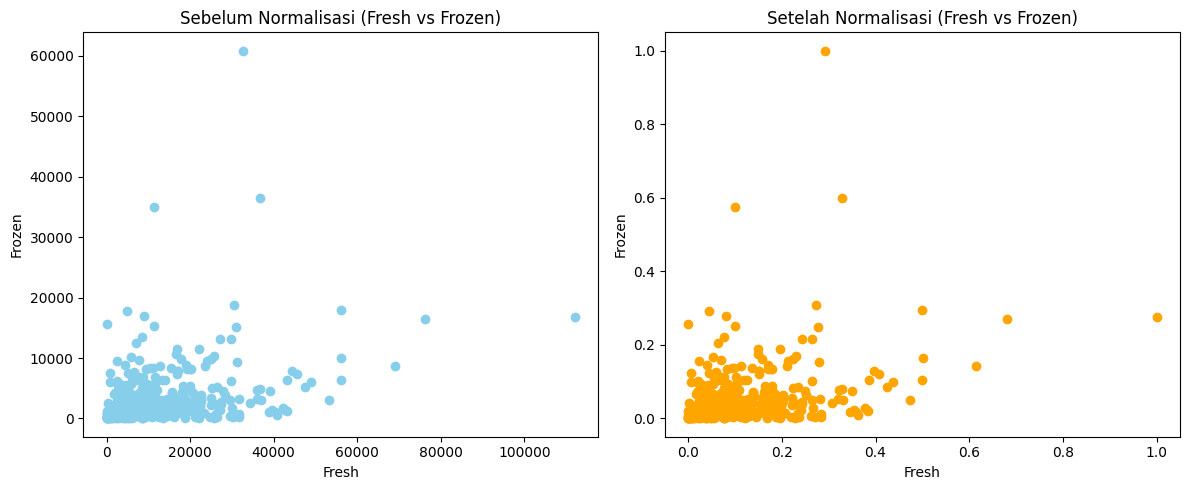

In [ ]:
import matplotlib.pyplot as plt

# Ambil contoh cluster: Fresh dan Frozen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(data_cluster1['Fresh'], data_cluster1['Frozen'], color='skyblue')
axs[0].set_title("Sebelum Normalisasi (Fresh vs Frozen)")
axs[0].set_xlabel("Fresh")
axs[0].set_ylabel("Frozen")

axs[1].scatter(data_cluster1_norm['Fresh'], data_cluster1_norm['Frozen'], color='orange')
axs[1].set_title("Setelah Normalisasi (Fresh vs Frozen)")
axs[1].set_xlabel("Fresh")
axs[1].set_ylabel("Frozen")

plt.tight_layout()
plt.show()

##Evaluasi

In [ ]:
# ------------------ Evaluation Metrics ------------------
def inertia(data, clusters, centroids):
    data_np = data.to_numpy()
    return sum(np.sum((data_np[clusters == i] - centroids[i]) ** 2) for i in range(len(centroids)))

def silhouette_score(data, clusters):
    data_np = data.to_numpy()
    n = len(data_np)
    unique_clusters = np.unique(clusters)
    silhouette_vals = []

    for i in range(n):
        own_cluster = clusters[i]
        own_points = data_np[clusters == own_cluster]
        other_clusters = unique_clusters[unique_clusters != own_cluster]

        a = np.mean(np.linalg.norm(own_points - data_np[i], axis=1)) if len(own_points) > 1 else 0
        b = np.min([
            np.mean(np.linalg.norm(data_np[clusters == other] - data_np[i], axis=1))
            for other in other_clusters
        ]) if len(other_clusters) > 0 else 0

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_vals.append(s)

    return np.mean(silhouette_vals)

##Eksperimen

**Eksperimen 1**

In [ ]:
# ------------------ Setup Eksperimen ------------------
clusters_features = {
    "Cluster1_Fresh_Frozen": ['Fresh', 'Frozen'],
    "Cluster2_Milk_Grocery": ['Milk', 'Grocery'],
    "Cluster3_Detergents_Delicatessen": ['Detergents_Paper', 'Delicassen']
}

results = []

In [ ]:
# ------------------ Lakukan Eksperimen 1 ------------------
for cluster_name, features in clusters_features.items():
    original_data = data_clean[features].copy()

    for norm in [False, True]:  # Tanpa normalisasi dan dengan normalisasi
        # Mengganti min_max_norm dengan normalize
        data_used = normalize(original_data) if norm else original_data.copy()

        for k in range(2, 6):  # k = 2 sampai 5
            # Pastikan data_used adalah DataFrame saat memanggil kmeans
            clusters, centroids = kmeans(data_used, k)
            sse = inertia(data_used, clusters, centroids)
            sil = silhouette_score(data_used, clusters)

            results.append({
                "Cluster": cluster_name,
                "Normalization": norm,
                "k": k,
                "SSE": round(sse, 2),
                "Silhouette": round(sil, 4)
            })

In [ ]:
# ------------------ Hasil Eksperimen 1 ------------------
results_df = pd.DataFrame(results)

# Sortir hasil untuk ditampilkan
print("=== HASIL EKSPERIMEN K-MEANS ===")
print(results_df.sort_values(by=['Cluster', 'Normalization', 'Silhouette'], ascending=[True, True, False]))

# Tampilkan hasil terbaik tiap cluster
best_results = results_df.loc[results_df.groupby(['Cluster'])['Silhouette'].idxmax()]
print("\n=== HASIL TERBAIK PER CLUSTER ===")
print(best_results)

=== HASIL EKSPERIMEN K-MEANS ===
                             Cluster  Normalization  k           SSE  \
0              Cluster1_Fresh_Frozen          False  2  7.686636e+09   
1              Cluster1_Fresh_Frozen          False  3  4.236642e+09   
2              Cluster1_Fresh_Frozen          False  4  2.602862e+09   
3              Cluster1_Fresh_Frozen          False  5  1.995485e+09   
5              Cluster1_Fresh_Frozen           True  3  1.118000e+01   
4              Cluster1_Fresh_Frozen           True  2  1.943000e+01   
7              Cluster1_Fresh_Frozen           True  5  6.770000e+00   
6              Cluster1_Fresh_Frozen           True  4  8.520000e+00   
8              Cluster2_Milk_Grocery          False  2  4.117883e+09   
9              Cluster2_Milk_Grocery          False  3  2.713156e+09   
10             Cluster2_Milk_Grocery          False  4  2.072180e+09   
11             Cluster2_Milk_Grocery          False  5  1.786491e+09   
12             Cluster2_Milk_Gr

In [ ]:
print("\n=== EVALUASI TRAIN-TEST SPLIT MANUAL UNTUK SEMUA CLUSTER ===")
cluster_configs = {
    "Cluster1_Fresh_Frozen": ['Fresh', 'Frozen'],
    "Cluster2_Milk_Grocery": ['Milk', 'Grocery'],
    "Cluster3_Detergents_Delicatessen": ['Detergents_Paper', 'Delicassen']
}

for cluster_name, features in cluster_configs.items():
    print(f"\n--- {cluster_name} ---")

    # Ambil data normalisasi
    data = normalize(data_clean[features]).to_numpy()
    np.random.seed(42)
    indices = np.arange(len(data))
    np.random.shuffle(indices)

    split_idx = int(0.7 * len(data))
    train_idx = indices[:split_idx]
    test_idx = indices[split_idx:]

    train_data = data[train_idx]
    test_data = data[split_idx:]

    # Tentukan k terbaik dari eksperimen (misalnya kamu pilih k=3 dulu, bisa diubah nanti)
    k = 3
    clusters_train, centroids_train = kmeans(pd.DataFrame(train_data, columns=features), k=k)

    # Assign cluster untuk test data
    distances_test = np.linalg.norm(test_data[:, np.newaxis] - centroids_train, axis=2)
    clusters_test = np.argmin(distances_test, axis=1)

    # Hitung silhouette untuk data uji
    sil_test = silhouette_score(pd.DataFrame(test_data, columns=features), clusters_test)
    print(f"Silhouette Score (uji): {round(sil_test, 4)}")


=== EVALUASI TRAIN-TEST SPLIT MANUAL UNTUK SEMUA CLUSTER ===

--- Cluster1_Fresh_Frozen ---
Silhouette Score (uji): 0.5271

--- Cluster2_Milk_Grocery ---
Silhouette Score (uji): 0.5217

--- Cluster3_Detergents_Delicatessen ---
Silhouette Score (uji): 0.6119


**Eksperimen 2**

In [ ]:
import pandas as pd
import numpy as np

# Fungsi Min-Max Normalization
def eksp2_min_max_norm(data):
    return (data - data.min()) / (data.max() - data.min())

def eksp2_kmeans(data, k, max_iter=100):
    np.random.seed(42)
    n_samples, n_features = data.shape
    centroids = data.sample(n=k).to_numpy()
    data_np = data.to_numpy()

    for _ in range(max_iter):
        distances = np.linalg.norm(data_np[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.array([data_np[clusters == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

def eksp2_inertia(data, clusters, centroids):
    data_np = data.to_numpy()
    return sum(np.sum((data_np[clusters == i] - centroids[i]) ** 2) for i in range(len(centroids)))

def eksp2_silhouette_score(data, clusters):
    data_np = data.to_numpy()
    n = len(data_np)
    unique_clusters = np.unique(clusters)

    silhouette_vals = []
    for i in range(n):
        own_cluster = clusters[i]
        own_points = data_np[clusters == own_cluster]
        other_clusters = unique_clusters[unique_clusters != own_cluster]

        a = np.mean(np.linalg.norm(own_points - data_np[i], axis=1)) if len(own_points) > 1 else 0
        b = np.min([
            np.mean(np.linalg.norm(data_np[clusters == other] - data_np[i], axis=1))
            for other in other_clusters
        ]) if len(other_clusters) > 0 else 0

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_vals.append(s)

    return np.mean(silhouette_vals)

# Lakukan eksperimen
eksp2_results = []

for cluster_name, features in clusters_features.items():
    data_features = df[features]

    for norm in [False, True]:
        data_used = eksp2_min_max_norm(data_features) if norm else data_features.copy()

        for k in range(2, 6):  # Eksperimen k = 2 sampai 5
            clusters, centroids = eksp2_kmeans(data_used, k)
            sse = eksp2_inertia(data_used, clusters, centroids)
            sil = eksp2_silhouette_score(data_used, clusters)

            eksp2_results.append({
                "Cluster": cluster_name,
                "Normalization": norm,
                "k": k,
                "SSE": round(sse, 2),
                "Silhouette": round(sil, 4)
            })

# Simpan dan tampilkan hasil
eksp2_results_df = pd.DataFrame(eksp2_results)

print("=== HASIL EKSPERIMEN K-MEANS (EKSP2) ===")
print(eksp2_results_df.sort_values(by=['Cluster', 'Normalization', 'Silhouette'], ascending=[True, True, False]))

=== HASIL EKSPERIMEN K-MEANS (EKSP2) ===
                             Cluster  Normalization  k           SSE  \
0              Cluster1_Fresh_Frozen          False  2  3.742301e+10   
1              Cluster1_Fresh_Frozen          False  3  2.370353e+10   
3              Cluster1_Fresh_Frozen          False  5  1.684737e+10   
2              Cluster1_Fresh_Frozen          False  4  1.869891e+10   
4              Cluster1_Fresh_Frozen           True  2  4.740000e+00   
5              Cluster1_Fresh_Frozen           True  3  3.820000e+00   
6              Cluster1_Fresh_Frozen           True  4  2.640000e+00   
7              Cluster1_Fresh_Frozen           True  5  2.060000e+00   
8              Cluster2_Milk_Grocery          False  2  3.081552e+10   
9              Cluster2_Milk_Grocery          False  3  1.940431e+10   
10             Cluster2_Milk_Grocery          False  4  1.404355e+10   
11             Cluster2_Milk_Grocery          False  5  1.165372e+10   
12             Cluster2

In [ ]:
# Menampilkan hasil terbaik tiap cluster (berdasarkan Silhouette Score)
eksp2_best_results = eksp2_results_df.loc[
    eksp2_results_df.groupby(['Cluster'])['Silhouette'].idxmax()
]

print("\n=== HASIL TERBAIK PER CLUSTER (EKSP2) ===")
print(eksp2_best_results)


=== HASIL TERBAIK PER CLUSTER (EKSP2) ===
                             Cluster  Normalization  k           SSE  \
0              Cluster1_Fresh_Frozen          False  2  3.742301e+10   
12             Cluster2_Milk_Grocery           True  2  4.440000e+00   
21  Cluster3_Detergents_Delicatessen           True  3  3.130000e+00   

    Silhouette  
0       0.6273  
12      0.7079  
21      0.6979  


**Eksperimen 3**

In [ ]:
import pandas as pd
import numpy as np

# Fungsi Min-Max Normalization
def eksp3_min_max_norm(data):
    return (data - data.min()) / (data.max() - data.min())

def eksp3_kmeans(data, k, max_iter=100):
    np.random.seed(42)
    n_samples, n_features = data.shape
    centroids = data.sample(n=k).to_numpy()
    data_np = data.to_numpy()

    for _ in range(max_iter):
        distances = np.linalg.norm(data_np[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.array([data_np[clusters == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

def eksp3_inertia(data, clusters, centroids):
    data_np = data.to_numpy()
    return sum(np.sum((data_np[clusters == i] - centroids[i]) ** 2) for i in range(len(centroids)))

def eksp3_silhouette_score(data, clusters):
    data_np = data.to_numpy()
    n = len(data_np)
    unique_clusters = np.unique(clusters)

    silhouette_vals = []
    for i in range(n):
        own_cluster = clusters[i]
        own_points = data_np[clusters == own_cluster]
        other_clusters = unique_clusters[unique_clusters != own_cluster]

        a = np.mean(np.linalg.norm(own_points - data_np[i], axis=1)) if len(own_points) > 1 else 0
        b = np.min([
            np.mean(np.linalg.norm(data_np[clusters == other] - data_np[i], axis=1))
            for other in other_clusters
        ]) if len(other_clusters) > 0 else 0

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_vals.append(s)

    return np.mean(silhouette_vals)

  # Daftar Fitur per Cluster
clusters_features = {
    "Cluster1_Detergents_Grocery_Milk": ['Detergents_Paper', 'Grocery', 'Milk'],
    "Cluster2_Fresh_Frozen_Delicatessen" : ['Fresh', 'Frozen', 'Delicassen']
}

eksp3_results = []

for cluster_name, features in clusters_features.items():
    data_features = df[features]

    for norm in [False, True]:
        data_used = eksp3_min_max_norm(data_features) if norm else data_features.copy()

        for k in range(2, 6):  # Eksperimen k = 2 sampai 5
            clusters, centroids = eksp3_kmeans(data_used, k)
            sse = inertia(data_used, clusters, centroids)
            sil = silhouette_score(data_used, clusters)

            eksp3_results.append({
                "Cluster": cluster_name,
                "Normalization": norm,
                "k": k,
                "SSE": round(sse, 2),
                "Silhouette": round(sil, 4)
            })

# Simpan dan tampilkan hasil
eksp3_results_df = pd.DataFrame(eksp3_results)

# Tampilkan hasil eksperimen terurut
print("=== HASIL EKSPERIMEN K-MEANS EKSP 3 ===")
print(eksp3_results_df.sort_values(by=['Cluster', 'Normalization', 'Silhouette'], ascending=[True, True, False]))

# Menampilkan hasil terbaik tiap cluster (berdasarkan Silhouette Score)
eksp3_best_results = eksp3_results_df.loc[eksp3_results_df.groupby(['Cluster'])['Silhouette'].idxmax()]
print("\n=== HASIL TERBAIK PER CLUSTER EKSP 3 ===")
print(eksp3_best_results)

=== HASIL EKSPERIMEN K-MEANS EKSP 3 ===
                               Cluster  Normalization  k           SSE  \
0     Cluster1_Detergents_Grocery_Milk          False  2  3.602417e+10   
1     Cluster1_Detergents_Grocery_Milk          False  3  2.244831e+10   
2     Cluster1_Detergents_Grocery_Milk          False  4  1.639636e+10   
3     Cluster1_Detergents_Grocery_Milk          False  5  1.397822e+10   
4     Cluster1_Detergents_Grocery_Milk           True  2  7.430000e+00   
5     Cluster1_Detergents_Grocery_Milk           True  3  4.420000e+00   
6     Cluster1_Detergents_Grocery_Milk           True  4  3.410000e+00   
7     Cluster1_Detergents_Grocery_Milk           True  5  3.000000e+00   
8   Cluster2_Fresh_Frozen_Delicatessen          False  2  4.073207e+10   
9   Cluster2_Fresh_Frozen_Delicatessen          False  3  2.692899e+10   
11  Cluster2_Fresh_Frozen_Delicatessen          False  5  1.991093e+10   
10  Cluster2_Fresh_Frozen_Delicatessen          False  4  2.175534e+10  

##Visualisasi

In [ ]:
def manual_pca(data, n_components=2):
    X = data - data.mean()
    cov = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov)
    idx = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:, idx]
    return X @ eig_vecs[:, :n_components]

**Visualisasi Eksperimen 1**

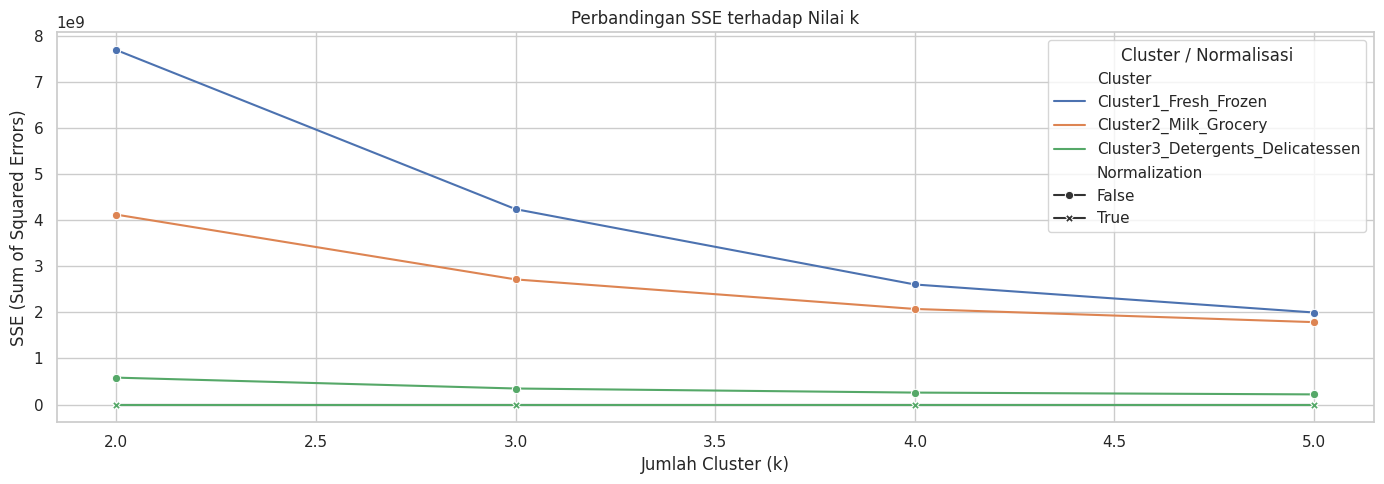

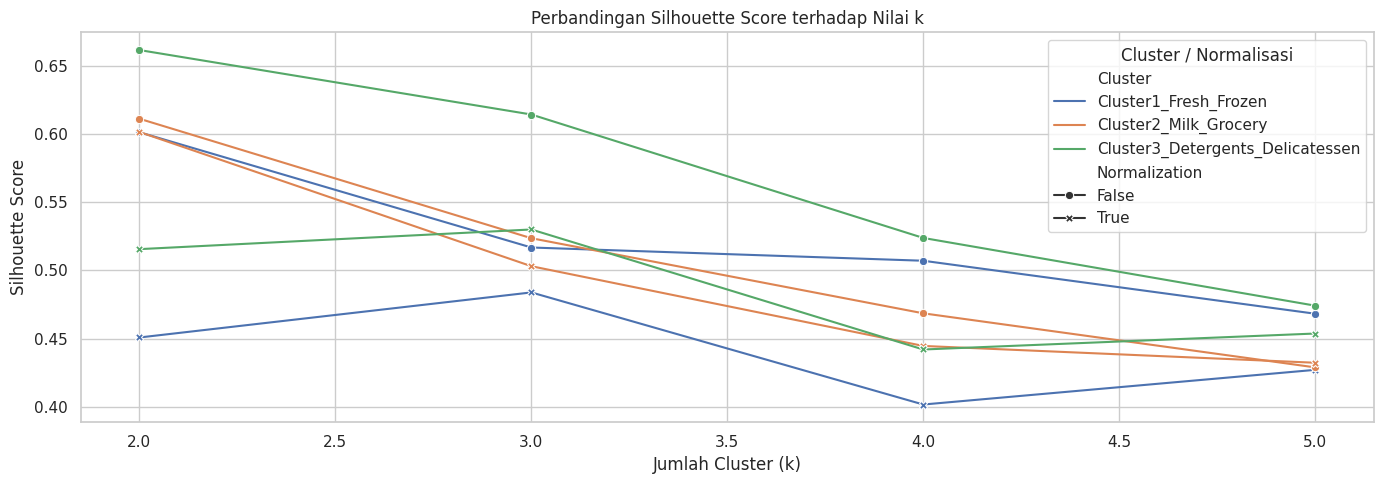

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

# ---------------- VISUALISASI SSE ----------------
plt.figure(figsize=(14, 5))
sns.lineplot(data=results_df, x="k", y="SSE", hue="Cluster", style="Normalization", markers=True, dashes=False)
plt.title("Perbandingan SSE terhadap Nilai k")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.legend(title="Cluster / Normalisasi")
plt.tight_layout()
plt.show()

# ---------------- VISUALISASI SILHOUETTE ----------------
plt.figure(figsize=(14, 5))
sns.lineplot(data=results_df, x="k", y="Silhouette", hue="Cluster", style="Normalization", markers=True, dashes=False)
plt.title("Perbandingan Silhouette Score terhadap Nilai k")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.legend(title="Cluster / Normalisasi")
plt.tight_layout()
plt.show()

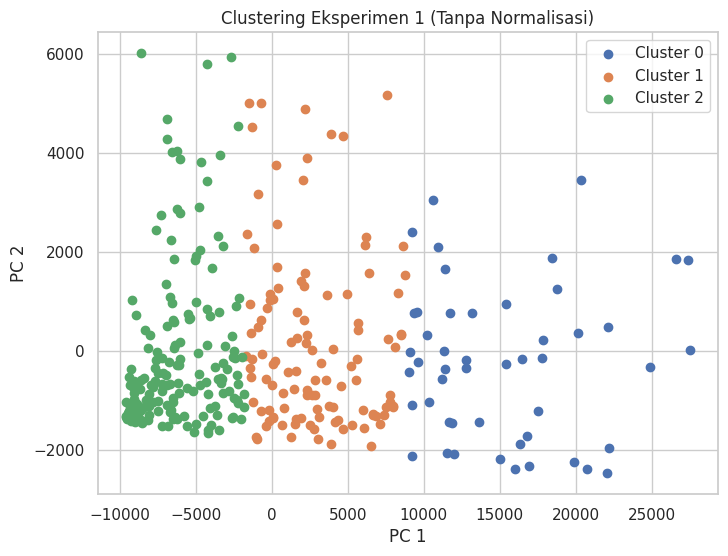

In [ ]:
#Visualisasi Hasil Clustering Eksperimen 1 (Tanpa Normalisasi)
features = ['Fresh', 'Frozen']
data_used = data_clean[features].copy()
cluster_labels, _ = kmeans(data_used, k=3)
reduced_data = manual_pca(data_used).to_numpy()  # ubah dari DataFrame ke array

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_labels):
    plt.scatter(reduced_data[cluster_labels == i, 0],
                reduced_data[cluster_labels == i, 1],
                label=f'Cluster {i}')
plt.title("Clustering Eksperimen 1 (Tanpa Normalisasi)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

**Visualisasi Eksperimen 2**

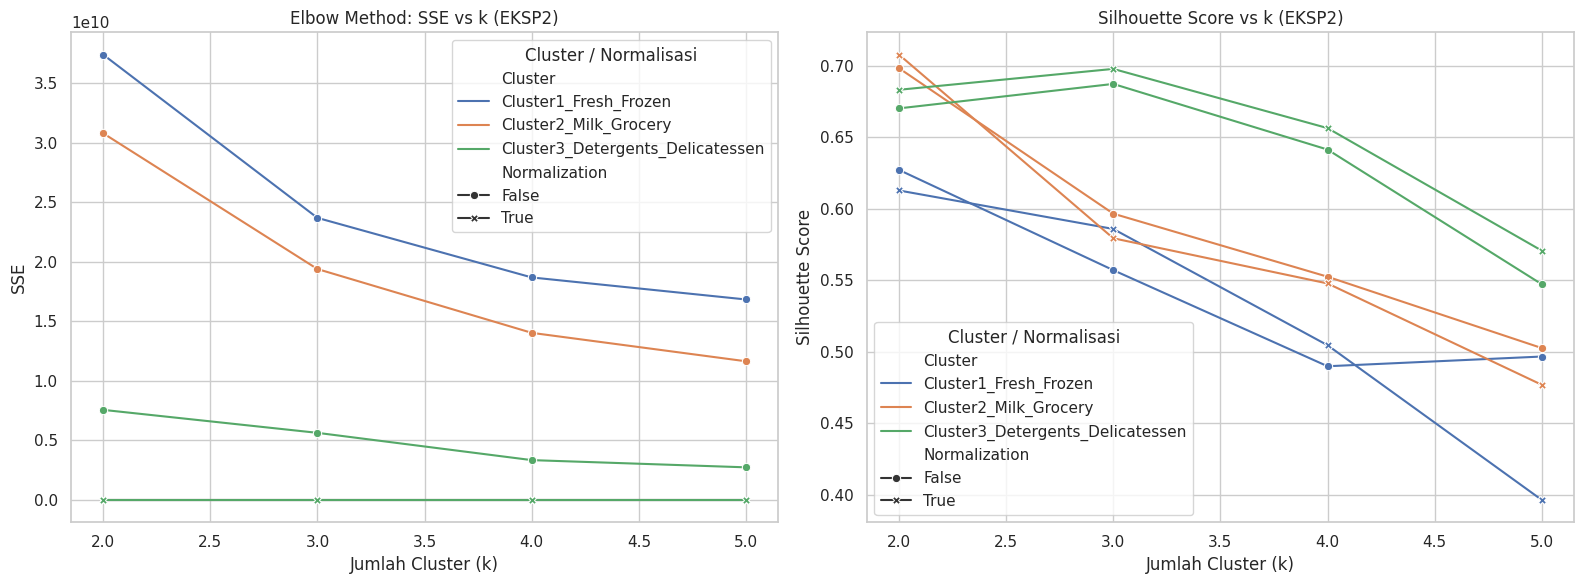

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi tampilan
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot SSE
plt.subplot(1, 2, 1)
sns.lineplot(
    data=eksp2_results_df,
    x="k", y="SSE", hue="Cluster", style="Normalization", markers=True, dashes=False
)
plt.title("Elbow Method: SSE vs k (EKSP2)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE")
plt.legend(title="Cluster / Normalisasi")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
sns.lineplot(
    data=eksp2_results_df,
    x="k", y="Silhouette", hue="Cluster", style="Normalization", markers=True, dashes=False
)
plt.title("Silhouette Score vs k (EKSP2)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.legend(title="Cluster / Normalisasi")

plt.tight_layout()
plt.show()

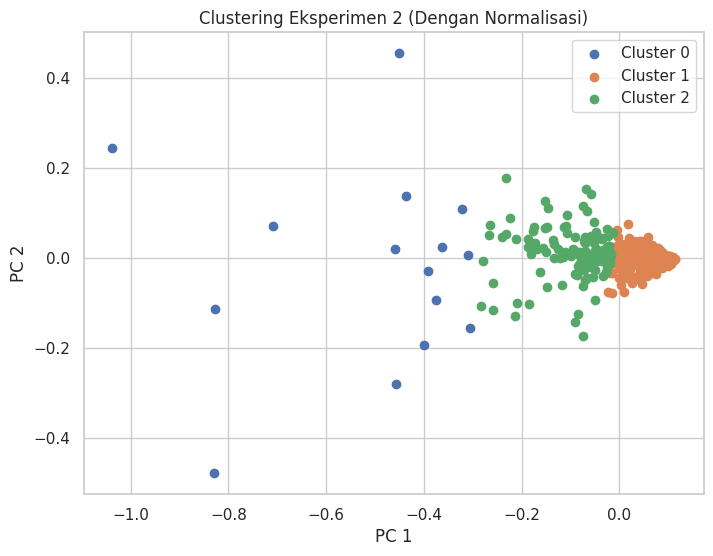

In [ ]:
features = ['Milk', 'Grocery']
data_used = eksp2_min_max_norm(df[features].copy())
cluster_labels, _ = eksp2_kmeans(data_used, k=3)
reduced_data = manual_pca(data_used).to_numpy()

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_labels):
    plt.scatter(reduced_data[cluster_labels == i, 0], reduced_data[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title("Clustering Eksperimen 2 (Dengan Normalisasi)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

**Visualisasi Eksperimen 3**

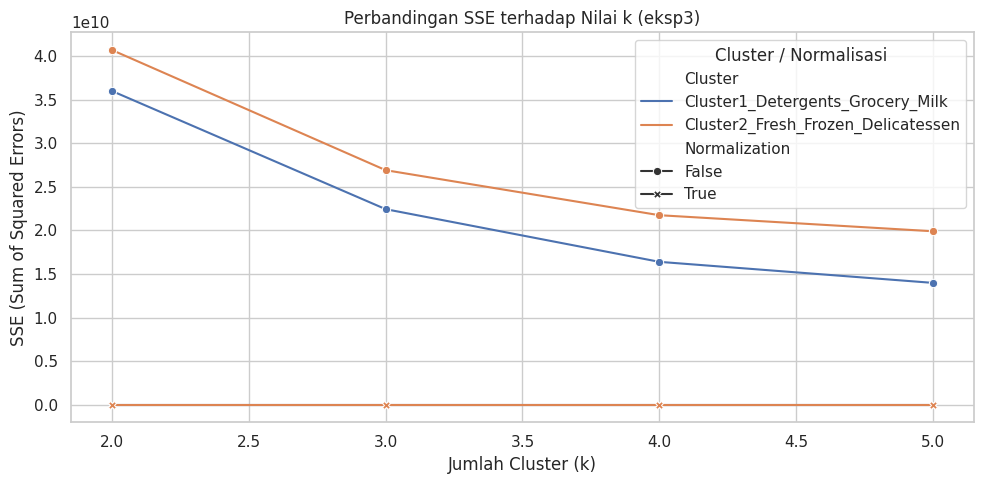

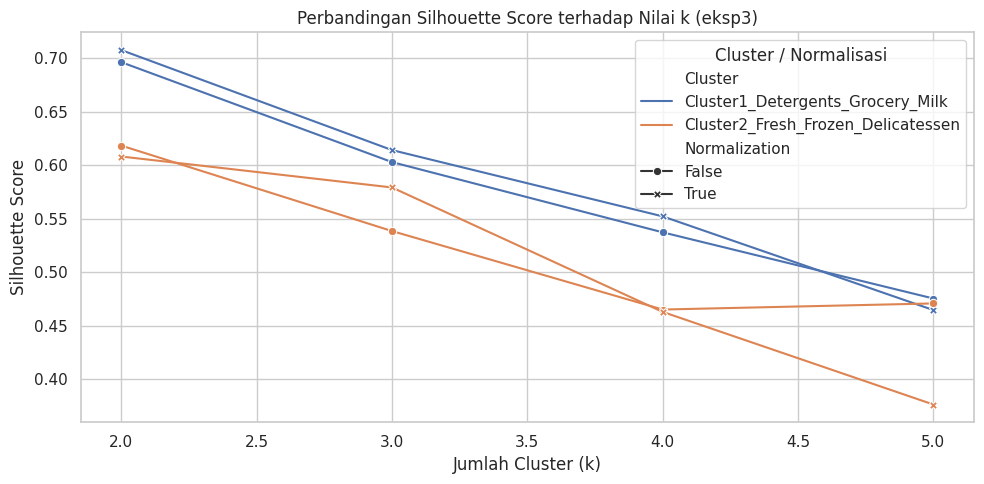

In [ ]:
# VISUALISASI SSE
plt.figure(figsize=(10, 5))
sns.lineplot(data=eksp3_results_df, x="k", y="SSE", hue="Cluster", style="Normalization", markers=True, dashes=False)
plt.title("Perbandingan SSE terhadap Nilai k (eksp3)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.legend(title="Cluster / Normalisasi")
plt.tight_layout()
plt.show()

# VISUALISASI SILHOUETTE
plt.figure(figsize=(10, 5))
sns.lineplot(data=eksp3_results_df, x="k", y="Silhouette", hue="Cluster", style="Normalization", markers=True, dashes=False)
plt.title("Perbandingan Silhouette Score terhadap Nilai k (eksp3)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.legend(title="Cluster / Normalisasi")
plt.tight_layout()
plt.show()

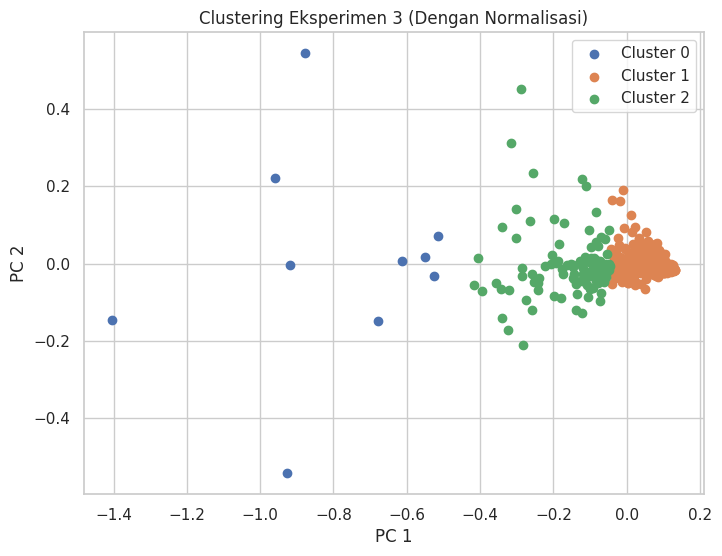

In [ ]:
features = ['Detergents_Paper', 'Grocery', 'Milk']
data_used = eksp3_min_max_norm(df[features].copy())
cluster_labels, _ = eksp3_kmeans(data_used, k=3)
reduced_data = manual_pca(data_used).to_numpy()

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_labels):
    plt.scatter(reduced_data[cluster_labels == i, 0], reduced_data[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title("Clustering Eksperimen 3 (Dengan Normalisasi)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

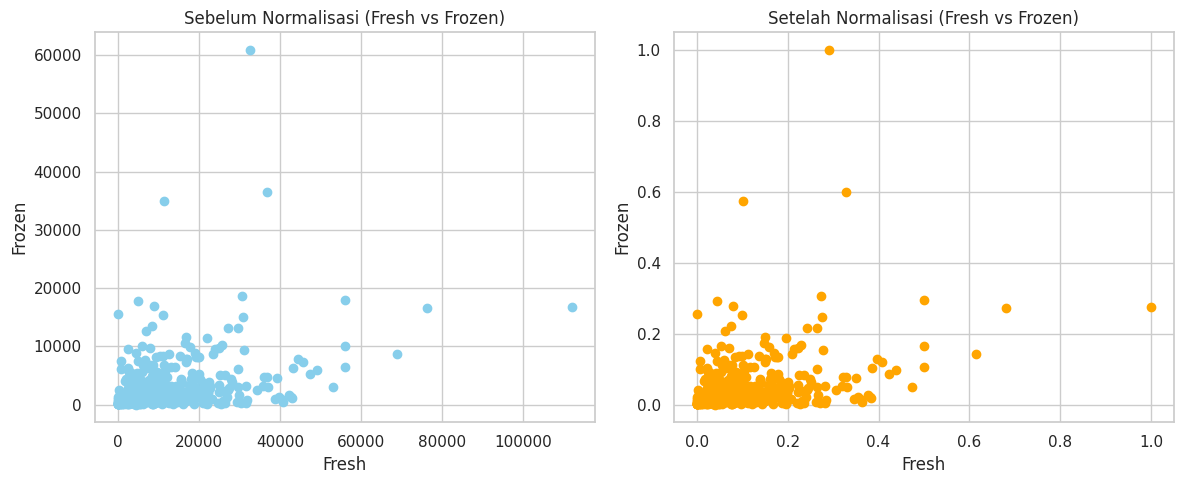

In [ ]:
import matplotlib.pyplot as plt

# Ambil contoh cluster: Fresh dan Frozen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(data_cluster1['Fresh'], data_cluster1['Frozen'], color='skyblue')
axs[0].set_title("Sebelum Normalisasi (Fresh vs Frozen)")
axs[0].set_xlabel("Fresh")
axs[0].set_ylabel("Frozen")

axs[1].scatter(data_cluster1_norm['Fresh'], data_cluster1_norm['Frozen'], color='orange')
axs[1].set_title("Setelah Normalisasi (Fresh vs Frozen)")
axs[1].set_xlabel("Fresh")
axs[1].set_ylabel("Frozen")

plt.tight_layout()
plt.show()

In [ ]:
def manual_pca(data, n_components=2):
    X = data - data.mean()
    cov = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov)
    idx = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:, idx]
    return X @ eig_vecs[:, :n_components]

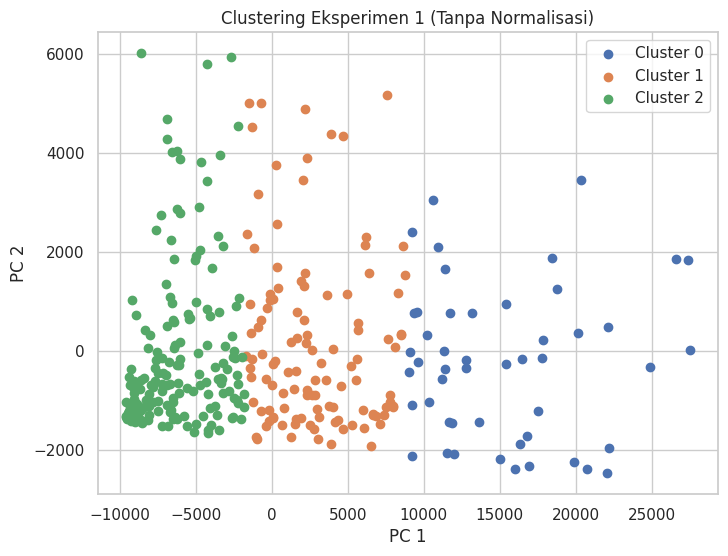

In [ ]:
#Visualisasi Hasil Clustering Eksperimen 1 (Tanpa Normalisasi)
features = ['Fresh', 'Frozen']
data_used = data_clean[features].copy()
cluster_labels, _ = kmeans(data_used, k=3)
reduced_data = manual_pca(data_used).to_numpy()  # ubah dari DataFrame ke array

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_labels):
    plt.scatter(reduced_data[cluster_labels == i, 0],
                reduced_data[cluster_labels == i, 1],
                label=f'Cluster {i}')
plt.title("Clustering Eksperimen 1 (Tanpa Normalisasi)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

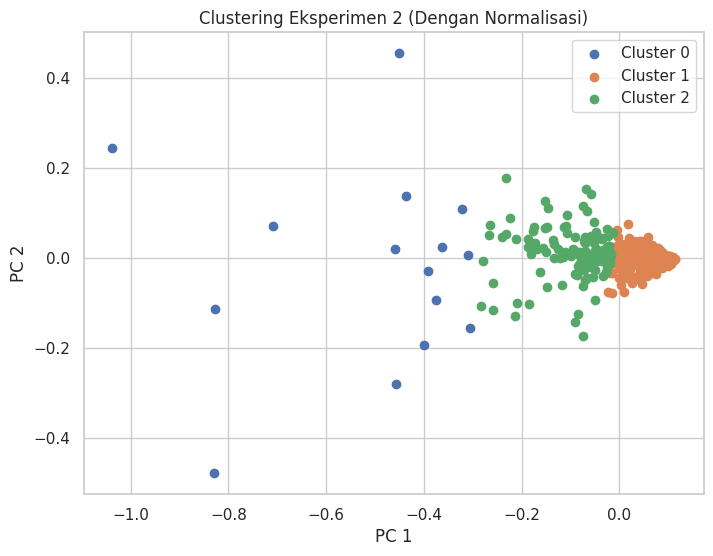

In [ ]:
features = ['Milk', 'Grocery']
data_used = eksp2_min_max_norm(df[features].copy())
cluster_labels, _ = eksp2_kmeans(data_used, k=3)
reduced_data = manual_pca(data_used).to_numpy()

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_labels):
    plt.scatter(reduced_data[cluster_labels == i, 0], reduced_data[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title("Clustering Eksperimen 2 (Dengan Normalisasi)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

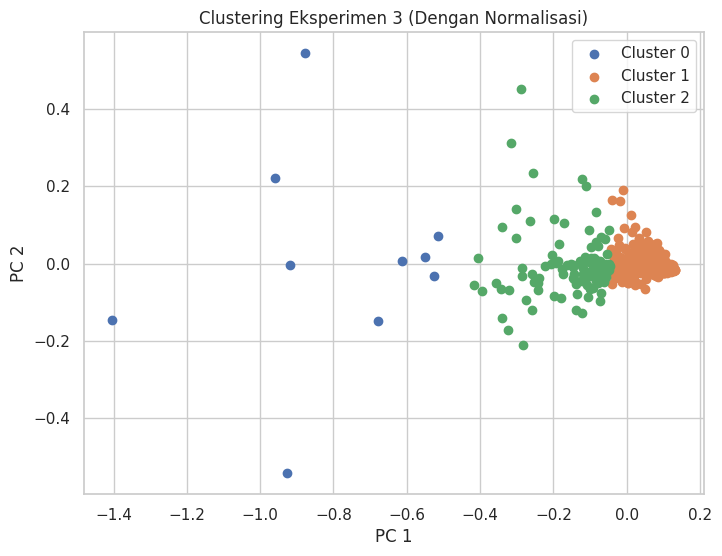

In [ ]:
features = ['Detergents_Paper', 'Grocery', 'Milk']
data_used = eksp3_min_max_norm(df[features].copy())
cluster_labels, _ = eksp3_kmeans(data_used, k=3)
reduced_data = manual_pca(data_used).to_numpy()

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_labels):
    plt.scatter(reduced_data[cluster_labels == i, 0], reduced_data[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title("Clustering Eksperimen 3 (Dengan Normalisasi)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

# Dataset Hasil Setiap Tahapan,

In [ ]:
# === SIMPAN DATASET SETIAP TAHAPAN ===

# 1. Dataset awal
df.to_csv("dataset_awal.csv", index=False)
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# 2. Dataset setelah outlier removal
data_clean.to_csv("dataset_setelah_outlier_removal.csv", index=False)
data_clean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395
433,1982,3218,1493,1541,356,1449
434,16731,3922,7994,688,2371,838
438,10290,1981,2232,1038,168,2125


In [ ]:
# 3. Dataset setelah normalisasi (versi full semua kolom)
data_normalized = normalize(data_clean)
data_normalized.to_csv("dataset_setelah_normalisasi.csv", index=False)
data_normalized

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.342019,0.643197,0.339396,0.024680,0.297903,0.367364
1,0.190479,0.653514,0.429521,0.226822,0.366942,0.487892
3,0.358113,0.076439,0.189411,0.832985,0.056212,0.491194
5,0.254098,0.549608,0.230051,0.083703,0.199866,0.398459
6,0.327357,0.210625,0.313081,0.059415,0.349877,0.149147
...,...,...,...,...,...,...
432,0.570140,0.074161,0.213346,0.031862,0.147781,0.107870
433,0.053439,0.211898,0.066909,0.197963,0.039371,0.397909
434,0.451705,0.259061,0.358840,0.086576,0.264109,0.229774
438,0.277779,0.129028,0.100094,0.132280,0.018403,0.583930


In [ ]:
# 4. Dataset final (contoh: yang digunakan untuk clustering pada eksperimen 1)
# kamu bisa sesuaikan dengan salah satu cluster, misal cluster 1
final_cluster_data = normalize(data_clean[['Fresh', 'Frozen']])
final_cluster_data.to_csv("dataset_final_clustering.csv", index=False)
final_cluster_data

,Fresh,Frozen
0,0.342019,0.024680
1,0.190479,0.226822
3,0.358113,0.832985
5,0.254098,0.083703
6,0.327357,0.059415
...,...,...
432,0.570140,0.031862
433,0.053439,0.197963
434,0.451705,0.086576
438,0.277779,0.132280


In [ ]:
# === FINAL DATASET EKSPERIMEN 2 ===

# Normalisasi semua cluster yang dipakai
for cluster_name, features in clusters_features.items():
    final_data_eksp2 = eksp2_min_max_norm(df[features])
    filename = f"dataset_final_clustering_eksp2_{cluster_name}.csv"
    final_data_eksp2.to_csv(filename, index=False)

final_data_eksp2

,Fresh,Frozen,Delicassen
0,0.112940,0.003106,0.027847
1,0.062899,0.028548,0.036984
2,0.056622,0.039116,0.163559
3,0.118254,0.104842,0.037234
4,0.201626,0.063934,0.108093
...,...,...,...
435,0.264829,0.215469,0.045912
436,0.349761,0.073713,0.048874
437,0.129543,0.006771,0.038882
438,0.091727,0.016649,0.044264


In [ ]:
# === FINAL DATASET EKSPERIMEN 3 ===

clusters_features_eksp3 = {
    "Cluster1_Detergents_Grocery_Milk": ['Detergents_Paper', 'Grocery', 'Milk'],
    "Cluster2_Fresh_Frozen_Delicatessen": ['Fresh', 'Frozen', 'Delicassen']
}

for cluster_name, features in clusters_features_eksp3.items():
    final_data_eksp3 = eksp3_min_max_norm(df[features])
    filename = f"dataset_final_clustering_eksp3_{cluster_name}.csv"
    final_data_eksp3.to_csv(filename, index=False)

final_data_eksp3

,Fresh,Frozen,Delicassen
0,0.112940,0.003106,0.027847
1,0.062899,0.028548,0.036984
2,0.056622,0.039116,0.163559
3,0.118254,0.104842,0.037234
4,0.201626,0.063934,0.108093
...,...,...,...
435,0.264829,0.215469,0.045912
436,0.349761,0.073713,0.048874
437,0.129543,0.006771,0.038882
438,0.091727,0.016649,0.044264
